In [0]:
"""
Upload hyperbolic_nn folder to your Google drive root directory and run the following.
Authentication (in-browser) is required
"""
from google.colab import drive
drive.mount('/content/gdrive')

import sys
sys.path.append('/content/gdrive/My Drive/hyperbolic_nn')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [0]:
root_path = '/content/gdrive/My Drive/hyperbolic_nn'

rand_in_embedds = np.loadtxt(root_path+"/2d_embedds/Rand_in_all_epochs/rand_in_hyperbolic_dim_2_epoch_31.txt",delimiter=',')
rand_in_embedds_words = np.loadtxt(root_path+"/2d_embedds/words_hyperbolic_dim_2.txt",delimiter=',',dtype=str)
rand_in_embedds_words = np.insert(rand_in_embedds_words,2,'') 
rand_in_embedds = np.hstack((rand_in_embedds,rand_in_embedds_words[:,np.newaxis]))

In [0]:
import plotly.express as px
df = pd.DataFrame({'dim1': rand_in_embedds[:,0],    
                   'dim2': rand_in_embedds[:,1],    
                   'word': rand_in_embedds[:,2]}) 
fig = px.scatter(df, x="dim1", y="dim2", hover_name="word")

fig.update_layout(
    title={'text': "Randomly Initialised Hyperbolic 2-D Embeddings",
           'y':0.95,
           'x':0.5,
           'xanchor': 'center',
           'yanchor': 'top'},
    xaxis_title="Dimension 1",
    yaxis_title="Dimension 2",
    font=dict(size=18)
)
fig.show()



In [0]:
import matplotlib.pyplot as plt
import time
import os

directory = root_path+"/2d_embedds/Rand_in_all_epochs"

i = 0

for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        fig, ax = plt.subplots(figsize=(10,7))
        rand_in_embedds = np.loadtxt(root_path+"/2d_embedds/Rand_in_all_epochs/"+filename,delimiter=',')
        plt.scatter(rand_in_embedds[:,0], rand_in_embedds[:,1],c="blue")
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        plt.xlim(-0.15, 0.1)
        plt.ylim(-0.1, 0.15)
        plt.xlabel('Dimension 1',fontsize=18)
        plt.ylabel('Dimension 2',fontsize=18)
        plt.tick_params(labelsize=14)
        plt.title("Randomly Initialised Hyperbolic Embeddings \n Epoch "+str(i),fontsize=24)
        if i < 10:
            filename= root_path+"/2d_embedds/Rand_in_all_epochs/epoch_0"+str(i)+".png"
        else:
            filename= root_path+"/2d_embedds/Rand_in_all_epochs/epoch_"+str(i)+".png"
        plt.savefig(filename)
        plt.gca()
        i +=1
 


In [0]:
import os
import imageio

png_dir = root_path+"/2d_embedds/Rand_in_all_epochs"
images = []

file_list = os.listdir(png_dir)
file_list.sort()
for file_name in file_list:
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
kargs = { 'duration': 0.2}
imageio.mimsave(root_path+"/2d_embedds/Rand_in_all_epochs/embeddings.gif", images,'GIF', **kargs)


In [0]:
root_path = '/content/gdrive/My Drive/hyperbolic_nn'

rand_in_embedds = np.loadtxt(root_path+"/2d_embedds/Rand_in_all_epochs/rand_in_hyperbolic_dim_2_epoch_31.txt",delimiter=',')
rand_in_embedds_words = np.loadtxt(root_path+"/2d_embedds/words_hyperbolic_dim_2.txt",delimiter=',',dtype=str)
rand_in_embedds_words = np.insert(rand_in_embedds_words,2,'') 

label_list1 = ['ladies','girls','female','lady','girl','women','woman']
# label_list2 = ['men','guy','man','guys','boy','male']
label_list2 = ['guy','men','guys','man','male','boy']
label_list3 = ['sleeps','sleep','asleep']

label_lists = [label_list1,label_list2,label_list3]

lcount = 0

for label_list in label_lists:

    fig = plt.figure(figsize=(15,10))
    ax1 = fig.add_subplot(111)

    label_ind_list = []

    for label in label_list:
        label_ind_list.append(np.where(rand_in_embedds_words == label)[0][0])


    ax1.scatter(rand_in_embedds[:,0], rand_in_embedds[:,1],c='b',alpha=0.05)
    ax1.scatter(rand_in_embedds[label_ind_list,0], rand_in_embedds[label_ind_list,1],c='b',alpha=1)

    ind = 0
    for i in label_ind_list:
            ax1.annotate(rand_in_embedds_words[i], (rand_in_embedds[i,0], rand_in_embedds[i,1]),ha=['left','right'][ind %2]
                         ,fontsize=16)
            ind += 1


    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    plt.ylim([-0.04,0.09])
    plt.xlim([-0.1,0.15])
    plt.xlabel('Dimension 1',fontsize=14)
    plt.ylabel('Dimension 2',fontsize=14)
    plt.tick_params(labelsize=14)
    plt.title("Hyperbolic 2-D Embeddings",fontsize=20)
    filename= root_path+"/2d_embedds/Rand_in_all_epochs/Embedds_labels_"+str(lcount)+".png"
    plt.savefig(filename)
    lcount +=1


In [0]:
import os
import imageio

png_dir = root_path+"/2d_embedds/Rand_in_all_epochs"
images = []

file_list = os.listdir(png_dir)
file_list.sort()
for file_name in file_list:
    if file_name.startswith('Embedds'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
kargs = { 'duration': 2}
imageio.mimsave(root_path+"/2d_embedds/Rand_in_all_epochs/Labelled_Embedds.gif", images,'GIF', **kargs)

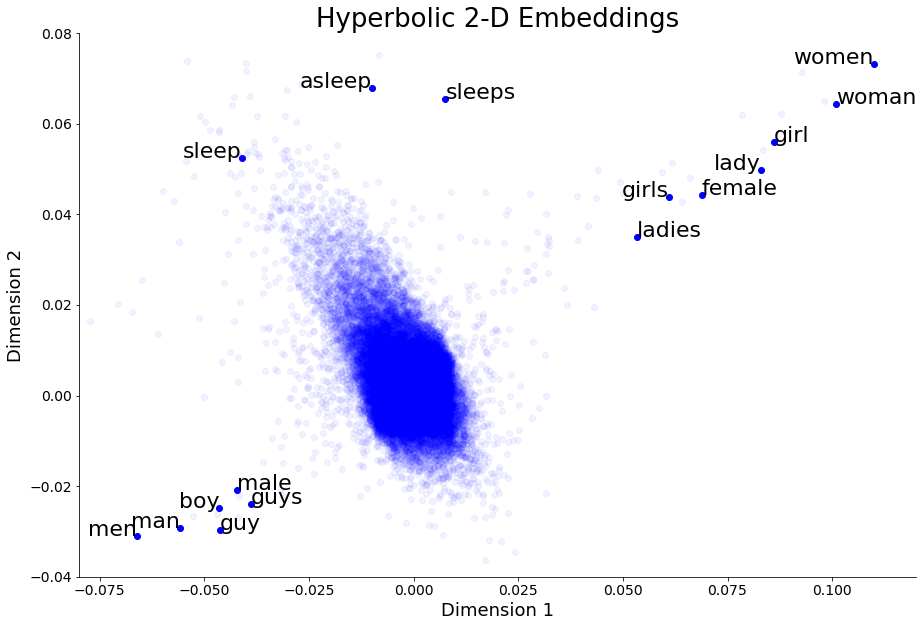

In [0]:
root_path = '/content/gdrive/My Drive/hyperbolic_nn'

lcount = 3

rand_in_embedds = np.loadtxt(root_path+"/2d_embedds/Rand_in_all_epochs/rand_in_hyperbolic_dim_2_epoch_31.txt",delimiter=',')
rand_in_embedds_words = np.loadtxt(root_path+"/2d_embedds/words_hyperbolic_dim_2.txt",delimiter=',',dtype=str)
rand_in_embedds_words = np.insert(rand_in_embedds_words,2,'') 

label_list = ['ladies','girls','female','lady','girl','women','woman','men','guy','man','guys','boy','male','sleep','sleeps','asleep']


fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

label_ind_list = []

for label in label_list:
    label_ind_list.append(np.where(rand_in_embedds_words == label)[0][0])


ax1.scatter(rand_in_embedds[:,0], rand_in_embedds[:,1],c='b',alpha=0.05)
ax1.scatter(rand_in_embedds[label_ind_list,0], rand_in_embedds[label_ind_list,1],c='b',alpha=1)

ind = 0
for i in label_ind_list:
        ax1.annotate(rand_in_embedds_words[i], (rand_in_embedds[i,0], rand_in_embedds[i,1]),ha=['left','right'][ind %2]
                        ,fontsize=22)
        ind += 1


ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
plt.ylim([-0.04,0.08])
plt.xlim([-0.08,0.12])
plt.xlabel('Dimension 1',fontsize=18)
plt.ylabel('Dimension 2',fontsize=18)
plt.tick_params(labelsize=14)
plt.title("Hyperbolic 2-D Embeddings",fontsize=26)
filename= root_path+"/2d_embedds/Rand_in_all_epochs/Embedds_labels_"+str(lcount)+".png"
plt.savefig(filename)



In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import time
import os

directory = root_path+"/poincare_glove_over_epochs.zip (Unzipped Files)/emb_rotated/"

i = 0 

file_list = os.listdir(directory)
file_list.sort()

epochs = [1,5,10,30,50]

for filename in file_list:
    if filename.endswith('.csv'):
        fig, ax = plt.subplots(figsize=(10,7))
        rand_in_embedds = pd.read_csv(directory+filename,delimiter=',')
        rand_in_embedds = np.asarray(rand_in_embedds)
        plt.scatter(rand_in_embedds[:,1], rand_in_embedds[:,2],c="blue")
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        plt.xlim(-0.3, 0.6)
        plt.ylim(-0.5, 0.3)
        plt.xlabel('Dimension 1',fontsize=18)
        plt.ylabel('Dimension 2',fontsize=18)
        plt.tick_params(labelsize=14)
        plt.title("Poincare Glove Embeddings - All Vocab \n Epoch "+str(epochs[i]),fontsize=24)
        plt.legend
        savepath = directory+filename.replace(".csv", ".png")
        plt.savefig(savepath)
        i +=1

In [0]:
import os
import imageio

png_dir = root_path+"/poincare_glove_over_epochs.zip (Unzipped Files)/emb_rotated/"
images = []

file_list = os.listdir(png_dir)
file_list.sort()
for file_name in file_list:
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
kargs = { 'duration': 0.5}
imageio.mimsave(png_dir+"emb_rotated.gif", images,'GIF', **kargs)

In [0]:
directory = root_path+"/poincare_glove_over_epochs.zip (Unzipped Files)/emb_snli_vocab/"

i = 0 

file_list = os.listdir(directory)
file_list.sort()

epochs = [1,5,10,30,50]

for filename in file_list:
    if filename.endswith('.csv'):
        fig, ax = plt.subplots(figsize=(10,7))
        rand_in_embedds = pd.read_csv(directory+filename,delimiter=',')
        rand_in_embedds = np.asarray(rand_in_embedds)
        plt.scatter(rand_in_embedds[:,1], rand_in_embedds[:,2],c="blue")
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        plt.xlim(-0.3, 0.6)
        plt.ylim(-0.5, 0.3)
        plt.xlabel('Dimension 1',fontsize=18)
        plt.ylabel('Dimension 2',fontsize=18)
        plt.tick_params(labelsize=14)
        plt.title("Poincare Glove Embeddings - SLNI Vocab \n Epoch "+str(epochs[i]),fontsize=24)
        savepath = directory+filename.replace(".csv", ".png")
        plt.savefig(savepath)
        i +=1

In [0]:
import os
import imageio

png_dir = root_path+"/poincare_glove_over_epochs.zip (Unzipped Files)/emb_snli_vocab/"
images = []

file_list = os.listdir(png_dir)
file_list.sort()
for file_name in file_list:
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
kargs = { 'duration': 0.5}
imageio.mimsave(png_dir+"emb_snli_vocab.gif", images,'GIF', **kargs)